<a href="https://colab.research.google.com/github/GilangAngga12/pcd/blob/main/Salinan_dari_pert9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

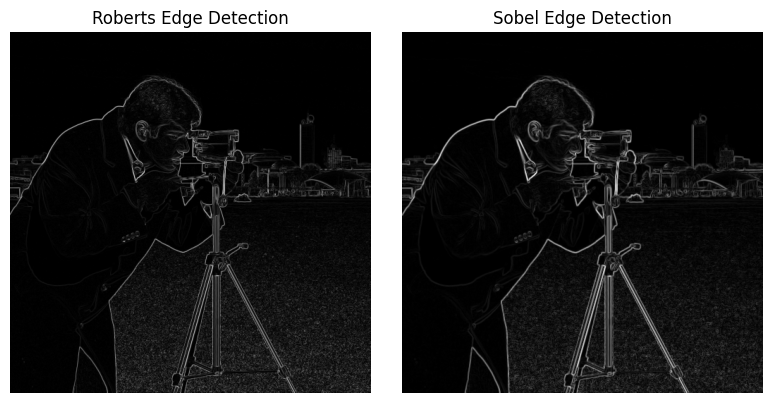

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images

image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

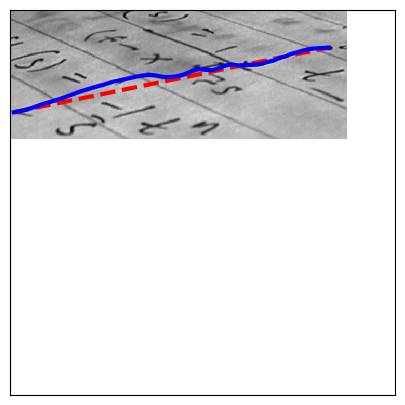

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.text()
r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r,c]).T

snake = active_contour(gaussian(img, 1), init, boundary_condition='fixed', alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9,5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:,1], init[:,0], '--r', lw=3)
ax.plot(snake[:,1], snake[:,0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, 512, 512, 0])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

def show(img):
  fig, ax = plt.subplots(1, 1, figsize=(8,8))
  ax.imshow(img, cmap=plt.cm.gray)
  ax.set_axis_off()
  plt.show()

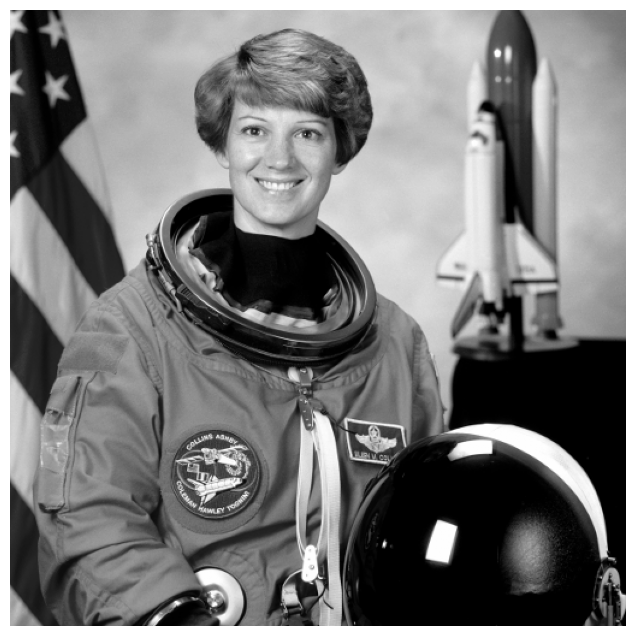

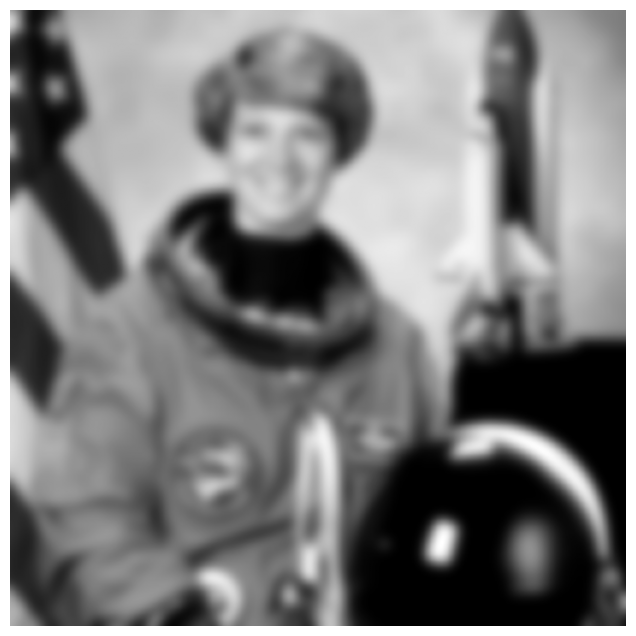

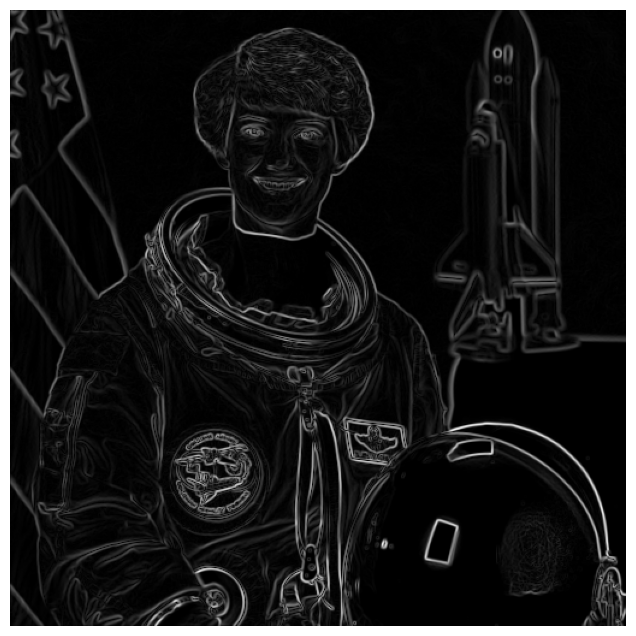

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

def show(img):
  fig, ax = plt.subplots(1, 1, figsize=(8,8))
  ax.imshow(img, cmap=plt.cm.gray)
  ax.set_axis_off()

# plt.show() # Dihapus karena salah posisi

astronaut_img = skic.rgb2gray(skid.astronaut()) # Perbaikan typo dan penugasan variabel
show(astronaut_img)
show(skif.gaussian(astronaut_img, 5.))
sobimg = skif.sobel(astronaut_img)
show(sobimg)

interactive(children=(FloatSlider(value=1.0, description='x', max=2.0, min=0.01, step=0.005), Output()), _dom_…

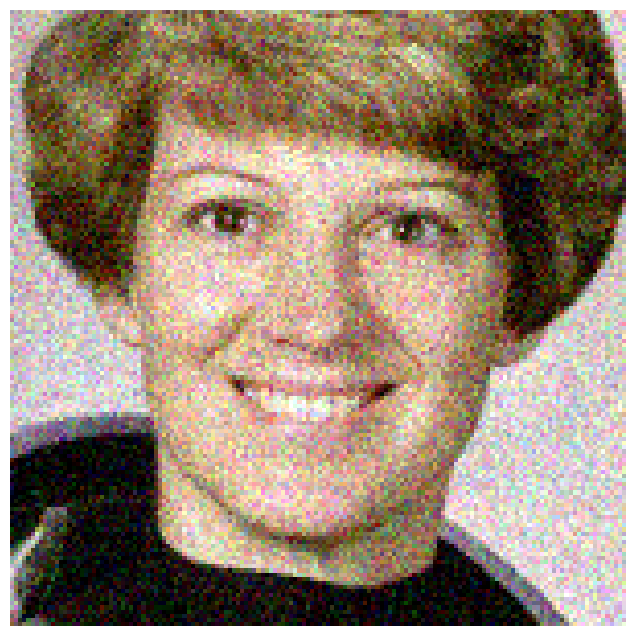

In [ ]:
from ipywidgets import widgets

@widgets.interact (x=(0.01, 2, .005))
def edge(x):
  show(sobimg < x)

img = skimage.img_as_float(skid.astronaut())
# we take a portion of the image to show the details.

img = img [50:200, 150:300]
# we add Gaussian noise.

img_n = sku.random_noise(img)
show(img_n)

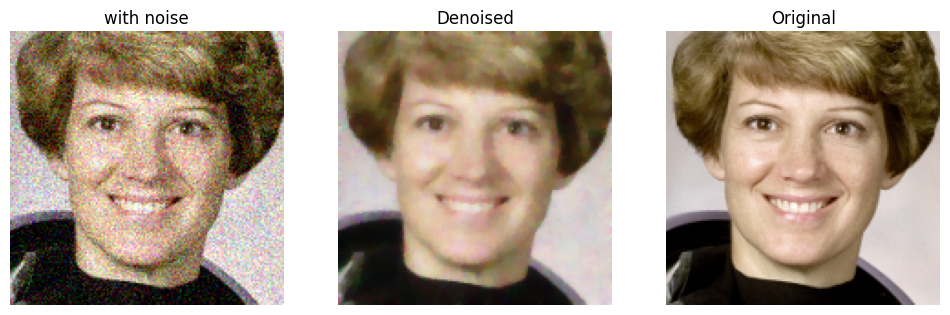

In [ ]:
img_r = skimage.restoration.denoise_tv_bregman(img_n, 5.)

fig, (axl, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

axl.imshow(img_n)
axl.set_title('with noise')
axl.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.set_axis_off()

ax3.imshow(img)
ax3.set_title('Original')
ax3.set_axis_off()

**layar depan**

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


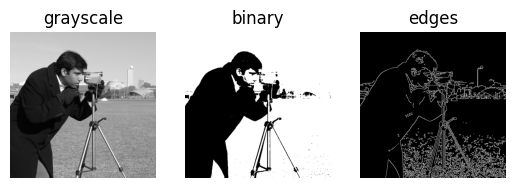

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

#thresholding


img = data.camera()
img = img.astype(np.uint8)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#deteksi tepi canny
edges = cv2.Canny(img, 100, 200)

plt.subplot(1, 3, 1)
plt.title('grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('binary')
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

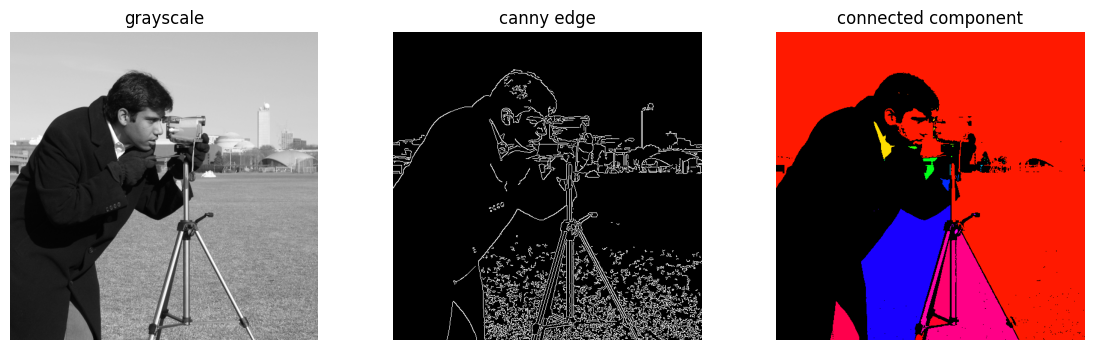

In [ ]:
from matplotlib import figure
from scipy.ndimage import label
_, labels = cv2.connectedComponents(binary)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
colored_label = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)
colored_label[label_hue == 0] = 0

plt.figure(figsize=(14,4))

plt.subplot(1, 3, 1)
plt.title('grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('canny edge')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('connected component')
plt.imshow(colored_label)
plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(binary, cmap='gray')
plt.title('citra biner')
plt.axis('off')
plt.show()

#lakukan deteksi kontur terlebih dahulu
contour, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#mengambil kontur paling panjang
contour = max(contours, key=len)

#ubah kontur menjadi array 20
contour_points = contour.reshape(-1, 2)

#menetapkan titik awal
start_x, start_y = contour_points[0]

#arah chain code
#4-connectivity
dirs4 = [
    (0, 1), #kanan
    (-1, 0), #atas
    (0, -1), #kiri
    (1, 0)]#bawah

dirs8 = [
    (0,1), #0 kanan
    (-1, 1), #1 kanan atas
    (-1, 0), #2 atas
    (-1, -1), #3 kiri atas
    (0, -1), #4 kiri
    (1, -1), #5 kiri bawah
    (1, 0), #6 bawah
    (1, 1) #7 kanan bawah
]

def chain_code_follow(contour_points, dirs):
  chain = []
  for i in range(1, len(contour_points)):
    y0, x0 = contour_points[i-1][0] - contour_points[i][0]
    y1, x1 = contour_points[i-1][1] - contour_points[i][1]

    #delta chain
    dy = y1-y0
    dx = x1-x0

    #menyesuaikan gerakan dengan tabel arah, ambil index agar tau langkahnya
    for k, (dy_dir, dx_dir) in enumerate(dirs):
      if dy == dy_dir and dx == dx_dir:
        chain.append(k)
        break
  return chain

#menghitung chain code
chain = chain_code_follow(contour_points, dirs4)
chain = chain_code_follow(contour_points, dirs8)

print("chain code 4-Connectivity(50 langkah pertama):")
print(chain4[:50])
print("chain code 8-Connectivity(50 langkah pertama):")
print(chain8[:50])

print("Total langkah:", len(chain8))

#visual
def visualize_chain(binary, contour_points, dirs, chain, title, color=(0,255,0)):
  #konversi citra biner ke RGB
  vis =cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

  #gambar titik kontur merah
  for x, y in contour_points:
    cv2.circle(vis, (x,y), 2, (0,0,255), -1)

  #gambar panah berdasarkan chain kode
  for i, direction in enumerate(chain[:400]):
    y0, x0 = contour_points[i][1], contour_points[i][0]
    dy, dx = dirs[direction]
    y1,x1-

  #gambar panah gerakan
  cv2.arrowedLine(
      vis,
      (x0, y0),
      (x1, y1),
      color
  )